In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.cluster import KMeans

# question1 ici ,nous allons importer nos données

In [2]:
data=pd.read_excel(r'C:\Users\Freddy MKK\Documents\Mes documents\dataset_laurent_kabala_ilunga\data_vin.xlsx')

In [3]:
data.head()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.shape

(6497, 13)

In [5]:
data= data.drop('ID_individu',axis=1)

         ici, nous allons verifier si nous avons des valeurs manquantes dans les données 

<AxesSubplot:>

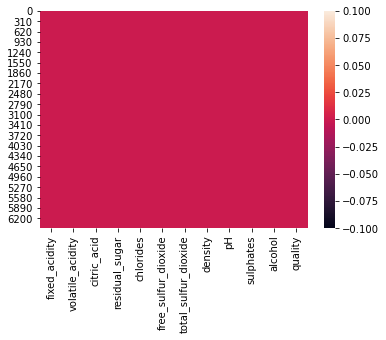

In [6]:
 sn.heatmap(data.isna())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


# Question2:Affichage des caracteristiques de chaque données

In [8]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# QUESTION3 :SEGMENTATION DE DONNEES AVEC K_MEANS

In [9]:
def K_means(data):
    model=  KMeans(n_clusters=10,random_state=0)
    model.fit(data)
    print(model.labels_)
    return model.labels_
  

In [10]:
K_means(data)

[9 6 7 ... 4 4 4]


array([9, 6, 7, ..., 4, 4, 4])

In [11]:
data['classe'] =  K_means(data)

[9 6 7 ... 4 4 4]


In [12]:
data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,9
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,7
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,4
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,4
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,4
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,4


# Question4 :Determination  de la taille de chaque classe

In [13]:
data.classe.value_counts()

7    1101
6     873
5     800
2     789
1     646
4     606
3     603
9     466
0     449
8     164
Name: classe, dtype: int64

# QUESTION5 Réprésentation graphique  des classes

In [14]:
from sklearn.decomposition import PCA
estimateur_pca =PCA(n_components=2)
dato =estimateur_pca.fit_transform(data)
dato=pd.DataFrame(dato)


[3 5 8 ... 6 6 6]


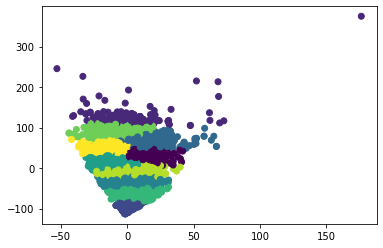

In [15]:
plt.scatter(dato.iloc[:,1],dato.iloc[:,0],c=K_means(data))

# Question6: determination des caracteristiques de chaque classes

In [16]:
data.groupby('classe').describe()

fixed_acidity                                                  \
               count      mean       std  min  25%  50%    75%   max   
classe                                                                 
0              449.0  6.984187  0.671748  5.2  6.5  7.0  7.400   9.8   
1              646.0  6.729799  0.779166  4.8  6.2  6.7  7.200   9.3   
2              789.0  8.474905  1.860995  4.7  7.1  8.0  9.700  15.6   
3              603.0  7.119403  0.923973  4.6  6.6  7.0  7.600  14.2   
4              606.0  7.952640  1.674372  4.6  6.9  7.6  8.700  15.6   
5              800.0  7.104875  1.264102  4.7  6.3  6.9  7.625  15.9   
6              873.0  6.954410  0.895148  4.4  6.4  6.8  7.400  11.8   
7             1101.0  6.812080  0.946404  3.8  6.2  6.8  7.300  12.4   
8              164.0  7.031707  0.817129  5.8  6.5  6.8  7.400   9.6   
9              466.0  6.839270  0.707755  4.2  6.4  6.8  7.300   8.8   

       volatile_acidity            ... alcohol       quality            \
                  count      mean  ...     75%   max   count      mean   
classe                             ...                                   
0                 449.0  0.301759  ...    10.0  13.1   449.0  5.576837   
1                 646.0  0.258676  ...    11.2  14.0   646.0  6.054180   
2                 789.0  0.513371  ...    11.3  14.0   789.0  5.722433   
3                 603.0  0.305763  ...    10.7  13.0   603.0  5.708126   
4                 606.0  0.476337  ...    11.1  14.0   606.0  5.607261   
5                 800.0  0.345131  ...    12.0  14.9   800.0  5.903750   
6                 873.0  0.301100  ...    11.3  14.0   873.0  5.854525   
7                1101.0  0.283488  ...    12.0  14.2  1101.0  6.061762   
8                 164.0  0.313293  ...     9.9  13.1   164.0  5.457317   
9                 466.0  0.265376  ...    10.2  13.3   466.0  5.641631   

                                           
             std  min  25%  50%  75%  max  
classe                                     
0       0.781481  3.0  5.0  6.0  6.0  8.0  
1       0.850995  4.0  5.0  6.0  7.0  9.0  
2       0.888600  3.0  5.0  6.0  6.0  8.0  
3       0.841836  3.0  5.0  6.0  6.0  8.0  
4       0.799306  3.0  5.0  6.0  6.0  8.0  
5       0.904438  3.0  5.0  6.0  6.0  9.0  
6       0.889880  3.0  5.0  6.0  6.0  9.0  
7       0.887182  3.0  6.0  6.0  7.0  9.0  
8       0.778157  3.0  5.0  5.0  6.0  7.0  
9       0.743650  3.0  5.0  6.0  6.0  8.0  

[10 rows x 96 columns]

nous allons créer une noulle variable qui va contenir  notre dataset

In [17]:
data_v = data.copy()

# PRETRAITEMENT  DE DONNEES

ici,nous allons d'abord identifier et  éliminer les valeurs extremes de notre datasets

In [18]:
 def valeur_extreme(data_v) :
    for col in data_v.select_dtypes('float'):
        plt.figure()
        sn.boxplot(data_v[col])
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

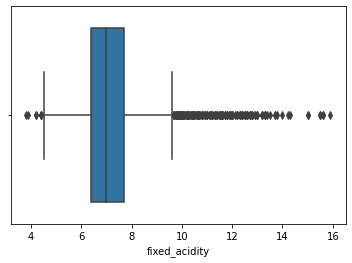

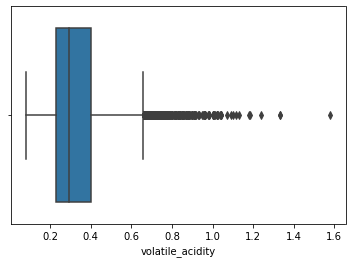

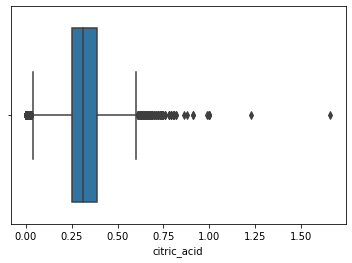

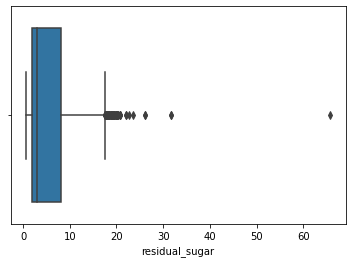

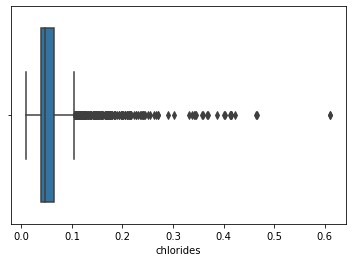

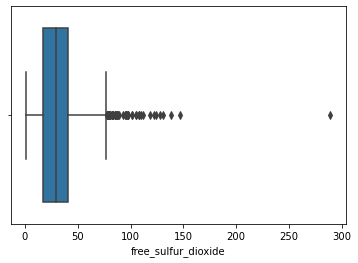

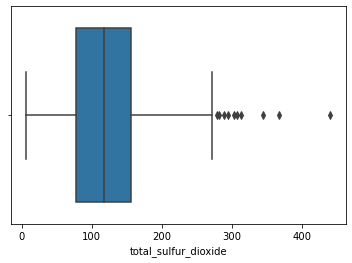

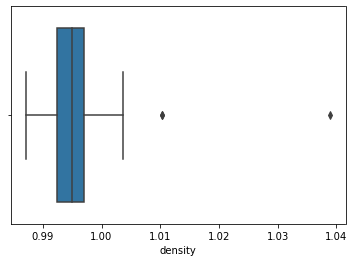

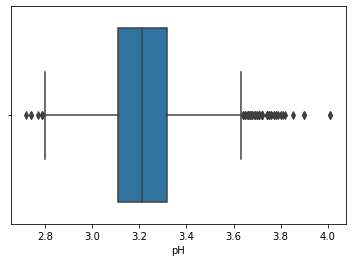

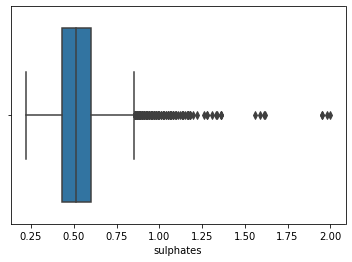

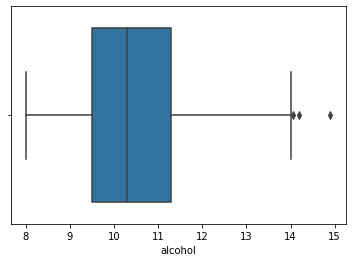

In [19]:
valeur_extreme(data_v)

In [20]:
 print(np.where(data_v['fixed_acidity']>14.8))

(array([5141, 5142, 5340, 5452, 5453, 5455, 5550], dtype=int64),)


In [21]:
data_v.drop(5550,axis=0,inplace=True)
data_v.drop(5455,axis=0,inplace=True)
data_v.drop(5453,axis=0,inplace=True)
data_v.drop(5452,axis=0,inplace=True)

In [22]:
print(np.where(data_v['volatile_acidity']>1.4))

(array([6193], dtype=int64),)


In [23]:
data_v.drop(6197,axis=0,inplace=True)


In [24]:
print(np.where(data_v['residual_sugar']>60))

(array([2781], dtype=int64),)


In [25]:
data_v.drop(2781,axis=0,inplace=True)

In [26]:
print(np.where(data_v['chlorides']>0.6))

(array([5048, 5155], dtype=int64),)


In [27]:
data_v.drop(5049,axis=0,inplace=True)
data_v.drop(5156,axis=0,inplace=True)

In [28]:
print(np.where(data_v['free_sulfur_dioxide']>250))
data_v.drop(4745,axis=0,inplace=True)

(array([4744], dtype=int64),)


In [29]:
print(np.where(data_v['total_sulfur_dioxide']>400))

(array([], dtype=int64),)


In [30]:
print(np.where(data_v['density']>1.03))

(array([], dtype=int64),)


In [31]:
print(np.where(data_v['pH']>4.0))

(array([6205, 6210], dtype=int64),)


In [32]:
data_v.drop(6214,axis=0,inplace=True)
data_v.drop(6219,axis=0,inplace=True)

In [33]:
print(np.where(data_v['sulphates']>1.85))

(array([4982, 4987, 4988], dtype=int64),)


In [34]:
print(np.where(data_v['alcohol']>14))

(array([3917, 4502], dtype=int64),)


In [35]:
print(np.where(data_v['quality']>8))

(array([ 774,  820,  827,  876, 1605], dtype=int64),)


In [36]:
data_v.drop(876,axis=0,inplace=True)
data_v.drop(1605,axis=0,inplace=True)

In [37]:
print(np.where(data_v['fixed_acidity']<4.4))



(array([2869, 3262, 4256, 4783], dtype=int64),)


In [38]:
data_v.head(4500)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,classe
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,9
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,7
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,6.8,0.20,0.25,6.2,0.052,22.0,106.0,0.9935,3.09,0.54,10.8,5,7
4499,5.2,0.38,0.26,7.7,0.053,20.0,103.0,0.9925,3.27,0.45,12.2,6,7
4500,7.8,0.27,0.33,2.4,0.053,36.0,175.0,0.9920,3.20,0.55,11.0,6,3
4501,6.6,0.54,0.21,16.3,0.055,41.0,182.0,0.9986,3.35,0.54,10.4,6,9


donc apres avoir eliminer les valeurs aberrantes notre dataset devient :

In [39]:
data_v.shape

(6484, 13)

In [40]:
x = data_v.drop('classe',axis=1 )
y = data_v.classe


# Q7 separation du dataset :

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
def prepocesing(x):
    standard =StandardScaler()
    standard.fit_transform(x)
    return standard
    

In [43]:
x_train ,x_test ,y_train,y_test =train_test_split(x,y,test_size =0.2)

In [44]:
x_train =prepocesing(x).transform(x_train)

In [45]:
x_test = prepocesing(x).transform(x_test)

# suite de la question 7 et  la question 9

In [46]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# ICI,nous avons  effectués la prediction pour chaque model

In [47]:
model =OneVsOneClassifier(KNeighborsClassifier(n_neighbors=2))

In [48]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print('le score  de knn est :',model.score(x_test,y_test))
    print('le vin est dans la classe :',model.predict([[7.5,0.29,0.33,21.6,0.048,38.0,142.0,0.9960,3.28,0.46,10.2,5]]) )
   

In [49]:
evaluation(model)

[[ 71   3   0   7   0   0   1   0   4   5]
 [  6 101   0   3   0   2  12   5   0   3]
 [  0   0 154   0  10   0   0   0   0   0]
 [ 19  18   0  60   0   0   9   0   0   3]
 [  0   0  56   0  56  11   0   1   0   0]
 [  0   0   4   0  21 112   8  18   0   0]
 [  2  21   0  35   0  13  85  24   0   0]
 [  0  27   1   1   3  51  33 102   0   0]
 [ 10   0   0   0   0   0   0   0  18   2]
 [ 17  13   0   5   0   0   0   0   0  51]]
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        91
           1       0.55      0.77      0.64       132
           2       0.72      0.94      0.81       164
           3       0.54      0.55      0.55       109
           4       0.62      0.45      0.52       124
           5       0.59      0.69      0.64       163
           6       0.57      0.47      0.52       180
           7       0.68      0.47      0.55       218
           8       0.82      0.60      0.69        30
           9       0.80     

In [50]:
model1 =  OneVsOneClassifier(LogisticRegression(random_state=0))

In [51]:
def evaluation(model1):
    model1.fit(x_train,y_train)
    ypred = model1.predict(x_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print('le score de regressionlogistic est :',model1.score(x_test,y_test))
    print('le vin est dans la classe :',model1.predict([[7.5,0.29,0.33,21.6,0.048,38.0,142.0,0.9960,3.28,0.46,10.2,5]]) ) 
  

In [52]:
evaluation(model1)

[[ 84   0   0   3   0   0   0   0   1   3]
 [  0 126   0   4   0   0   2   0   0   0]
 [  0   0 162   0   2   0   0   0   0   0]
 [  0   1   0 105   0   0   3   0   0   0]
 [  0   0   4   0 117   3   0   0   0   0]
 [  0   0   0   0   3 153   0   7   0   0]
 [  0   4   0   1   0   0 170   5   0   0]
 [  0   2   0   0   0   0   2 214   0   0]
 [  3   0   0   0   0   0   0   0  27   0]
 [  2   3   0   1   0   0   0   0   0  80]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        91
           1       0.93      0.95      0.94       132
           2       0.98      0.99      0.98       164
           3       0.92      0.96      0.94       109
           4       0.96      0.94      0.95       124
           5       0.98      0.94      0.96       163
           6       0.96      0.94      0.95       180
           7       0.95      0.98      0.96       218
           8       0.96      0.90      0.93        30
           9       0.96     

In [53]:
 model2 =OneVsOneClassifier(DecisionTreeClassifier(random_state=40))

In [54]:
 def evaluation(model2):
    model2.fit(x_train,y_train)
    ypred = model2.predict(x_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print('le score des arbre est :',model2.score(x_test,y_test))
    print('le vin est dans la classe :',model2.predict([[7.5,0.29,0.33,21.6,0.048,38.0,142.0,0.9960,3.28,0.46,10.2,5]]) )
    
    
    

In [55]:
evaluation(model2)

[[ 85   0   0   3   0   0   0   0   3   0]
 [  0 130   0   1   0   0   0   0   0   1]
 [  0   0 164   0   0   0   0   0   0   0]
 [  1   0   0 107   0   0   1   0   0   0]
 [  0   0   3   0 120   1   0   0   0   0]
 [  0   0   0   0   0 160   0   3   0   0]
 [  0   6   0   0   0   0 173   1   0   0]
 [  0   0   0   0   0   0   2 216   0   0]
 [  1   0   0   0   0   0   0   0  29   0]
 [  1   3   0   1   0   0   0   0   0  81]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        91
           1       0.94      0.98      0.96       132
           2       0.98      1.00      0.99       164
           3       0.96      0.98      0.97       109
           4       1.00      0.97      0.98       124
           5       0.99      0.98      0.99       163
           6       0.98      0.96      0.97       180
           7       0.98      0.99      0.99       218
           8       0.91      0.97      0.94        30
           9       0.99     

In [56]:
model3 =  OneVsOneClassifier(MLPClassifier(max_iter=1000,random_state=0))

In [57]:
def evaluation(model3):
    model3.fit(x_train,y_train)
    ypred = model3.predict(x_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print('le score de reseau de n est :',model3.score(x_test,y_test))
    print('le vin est dans la classe :',model3.predict([[7.5,0.29,0.33,21.6,0.048,38.0,142.0,0.9960,3.28,0.46,10.2,5]]) )
   

In [58]:
evaluation(model3)

[[ 86   0   0   3   0   0   0   0   1   1]
 [  0 125   0   3   0   0   3   1   0   0]
 [  0   0 161   0   3   0   0   0   0   0]
 [  0   1   0 105   0   0   2   0   0   1]
 [  0   0   7   0 115   2   0   0   0   0]
 [  0   0   0   0   3 155   0   5   0   0]
 [  0   1   0   4   0   0 170   5   0   0]
 [  0   1   0   0   0   1   5 211   0   0]
 [  2   0   0   0   0   0   0   0  28   0]
 [  2   2   0   2   0   0   0   0   0  80]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        91
           1       0.96      0.95      0.95       132
           2       0.96      0.98      0.97       164
           3       0.90      0.96      0.93       109
           4       0.95      0.93      0.94       124
           5       0.98      0.95      0.97       163
           6       0.94      0.94      0.94       180
           7       0.95      0.97      0.96       218
           8       0.97      0.93      0.95        30
           9       0.98     

# question8  :L'arbre de decision donne un score superieur par rapport aux autres modeles d'ou il est efficace pour ce dataset, il est suivi de reseau de neurone et de la regressionlogistic ,ils ont aussi un bon score  ,le knn donne un score qui est inferieure à 65 d'ou il est moins performant